Датасет: https://www.kaggle.com/datasets/paultimothymooney/denver-crime-data

Считываем данные из файлов, как и в part1:

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('C:\\RLib\\crime.csv')

Снова исключим столбцы с большим количеством пропусков, а так же строки с пропусками:

In [ ]:
df = df.drop(['INCIDENT_ADDRESS', 'LAST_OCCURRENCE_DATE', 'FIRST_OCCURRENCE_DATE'], axis=1)
df = df.dropna()

Преобразуем столбец REPORTED_DATE и разобьем его на стобцы year, month, day, hour и minute, а затем уберем столбец REPORTED_DATE из таблицы:

In [ ]:
import datetime
df['REPORTED_DATE']=df.REPORTED_DATE.apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df['year']=df.REPORTED_DATE.apply(lambda x:x.strftime('%Y')).astype(int)
df['month']=df.REPORTED_DATE.apply(lambda x:x.strftime('%m')).astype(int)
df['day']=df.REPORTED_DATE.apply(lambda x:x.strftime('%d')).astype(int)
df['hour']=df.REPORTED_DATE.apply(lambda x:x.strftime('%H')).astype(int)
df['minute']=df.REPORTED_DATE.apply(lambda x:x.strftime('%M')).astype(int)

In [ ]:
df = df.drop(['REPORTED_DATE'], axis=1)

Нормируем числовые признаки:

In [ ]:
import math
numeric = ['INCIDENT_ID', 'OFFENSE_ID', 'GEO_X', 'GEO_Y', 'GEO_LON', 'GEO_LAT']
for column in numeric:
    df[column] = (df[column] - df[column].mean()) / (math.sqrt(df[column].var()))

Количество различных районов и видов преступлений:

In [ ]:
print('NEIGHBORHOOD_ID', df['NEIGHBORHOOD_ID'].nunique())
print('OFFENSE_TYPE_ID', df['OFFENSE_TYPE_ID'].nunique())

NEIGHBORHOOD_ID 79
OFFENSE_TYPE_ID 192


Преобразуем текстовые значения в числовые, сохраняя при этом отдельно названия районов и видов преступлений в массивы neighborhood_id и offense_type_id соответственно:

In [ ]:
cur_set = set(df['OFFENSE_CATEGORY_ID'])
i = 0
for item in cur_set:
    df['OFFENSE_CATEGORY_ID'] = df['OFFENSE_CATEGORY_ID'].replace(item, i)
    i = i + 1

cur_set = set(df['OFFENSE_TYPE_ID'])
offense_type_id = []
i = 0
for item in cur_set:
    offense_type_id.append(item)
    df['OFFENSE_TYPE_ID'] = df['OFFENSE_TYPE_ID'].replace(item, i)
    i += 1

cur_set = set(df['NEIGHBORHOOD_ID'])
neighborhood_id = []
i = 0
for item in cur_set:
    neighborhood_id.append(item)
    df['NEIGHBORHOOD_ID'] = df['NEIGHBORHOOD_ID'].replace(item, i)
    i += 1

### 1) Выделить районы с наибольшим или наименьшим количеством преступлений

Всего различных районов 79, посчитаем количество преступлений для каждого из них

In [ ]:
count_crimes = [0] * 79
for index, row in df.iterrows():
    if df['IS_CRIME'][index]:
        count_crimes[df['NEIGHBORHOOD_ID'][index]] += 1

print(count_crimes)

[3138, 4888, 10419, 1309, 6637, 5155, 3127, 2003, 2323, 3057, 4000, 1778, 2728, 4851, 7016, 2532, 395, 2962, 10568, 3303, 2982, 2249, 3706, 10452, 4577, 1895, 2786, 2757, 22108, 4242, 4987, 2835, 6173, 2732, 4787, 3843, 1766, 3414, 14274, 1106, 8462, 1770, 14022, 2581, 13154, 2694, 2203, 1910, 1795, 1818, 14069, 2367, 803, 4628, 543, 2754, 4942, 9120, 5304, 2688, 4479, 7429, 5540, 5293, 4434, 1174, 8355, 1495, 2823, 3320, 6423, 2560, 3356, 8967, 6910, 2538, 3092, 2956, 1947]


По результатам подсчетов найдем район с минимальным и район с максимальным количеством преступлений:

In [ ]:
min_ind = 0
max_ind = 0
for i in range(79):
    if count_crimes[i] < count_crimes[min_ind]:
        min_ind = i
    if count_crimes[i] > count_crimes[max_ind]:
        max_ind = i

print("Район с минимальным количеством преступлений: ", f"{neighborhood_id[min_ind]} - {count_crimes[min_ind]}")
print("Район с максимальным количеством преступлений: ", f"{neighborhood_id[max_ind]} - {count_crimes[max_ind]}")

Район с минимальным количеством преступлений:  wellshire - 395
Район с максимальным количеством преступлений:  five-points - 22108


### 2) Выделить наиболее популярные преступления в каждом районе

Посчитаем, сколько преступлений каждого вида в каждом из районов, а затем, на основе вычислений найдем наиболее популярные в каждом районе преступления:

In [ ]:
crimes_in_neighborhood = [0] * 79
for i in range(79):
    crimes_in_neighborhood[i] = [0] * 192

popular_crimes = [-1] * 79

for index, row in df.iterrows():
    if df['IS_CRIME'][index]:
        curr_neighborhood = df['NEIGHBORHOOD_ID'][index]
        curr_crime_type = df['OFFENSE_TYPE_ID'][index]
        crimes_in_neighborhood[curr_neighborhood][curr_crime_type] += 1
        if popular_crimes[curr_neighborhood] == -1 or crimes_in_neighborhood[curr_neighborhood][popular_crimes[curr_neighborhood]] < crimes_in_neighborhood[curr_neighborhood][curr_crime_type]:
                popular_crimes[curr_neighborhood] = curr_crime_type

print("Наиболее популярные преступления по каждому из районов:")
for i in range(79):
    print(f"{neighborhood_id[i]} - {offense_type_id[popular_crimes[i]]}")

Наиболее популярные преступления по каждому из районов:
windsor - theft-of-motor-vehicle
hampden-south - theft-items-from-vehicle
union-station - criminal-trespassing
skyland - traf-other
hampden - theft-of-motor-vehicle
mar-lee - theft-of-motor-vehicle
auraria - criminal-trespassing
kennedy - theft-of-motor-vehicle
whittier - theft-of-motor-vehicle
goldsmith - theft-of-motor-vehicle
virginia-village - theft-of-motor-vehicle
hilltop - theft-items-from-vehicle
montclair - theft-shoplift
college-view-south-platte - theft-shoplift
baker - traf-other
university - theft-items-from-vehicle
wellshire - theft-items-from-vehicle
harvey-park-south - theft-of-motor-vehicle
civic-center - sex-off-fail-to-register
berkeley - theft-of-motor-vehicle
sloan-lake - theft-items-from-vehicle
platt-park - theft-items-from-vehicle
cherry-creek - theft-shoplift
east-colfax - traf-other
ruby-hill - traf-other
regis - theft-of-motor-vehicle
cole - traf-other
valverde - theft-of-motor-vehicle
five-points - thef

### 3) Объединить районы в кластеры по набору наиболее распространенных преступлений

Целевой признак - NEIGHBORHOOD_ID, в датасет для тренировки попадает столбец OFFENSE_TYPE_ID

In [ ]:
df_train = df[['OFFENSE_TYPE_ID']]
df_test = df['NEIGHBORHOOD_ID']

Разделим данные на тренировочные и проверочные:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train, df_test, test_size=.3, random_state=42)
#x_train

Стандартизируем данные:

In [ ]:
from sklearn import preprocessing
stand_X = pd.DataFrame(preprocessing.scale(x_train), columns = x_train.columns)

Применим PCA:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(stand_X)
less_dimensional_X = pca.transform(stand_X)

Построим двухмерное представление данных с помощью алгоритма tSNE:

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 0)
tsne_results = tsne.fit_transform(less_dimensional_X)

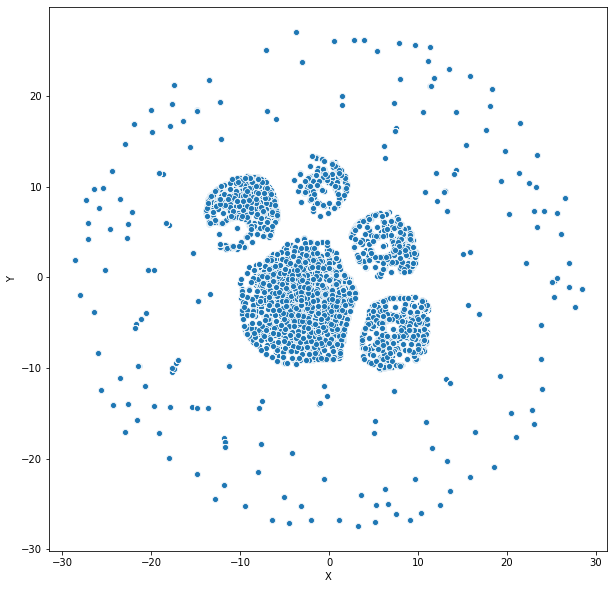

In [ ]:
tsne_df = pd.DataFrame({'X':tsne_results[:,0], 'Y':tsne_results[:,1], 'real_ans':y_train})
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.scatterplot(x="X", y="Y", data=tsne_df);

Визуально можно выделить 4 кластера

### 4) Построить предсказание типа преступления по информации о времени и месте

In [ ]:
x = df.loc[:, df.columns.isin(['NEIGHBORHOOD_ID', 'hour', 'minute'])]
y = df.loc[:, df.columns.isin(['OFFENSE_TYPE_ID'])]

Построение классификатора Random Forest(Случайный Лес):

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=10)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_estimators': [50, 100, 150],'max_features': ['auto'],'max_depth' : list(range(1, 10)), 'criterion' :['gini']}
RFC = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, refit=True)
RFC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto'],
                         'n_estimators': [50, 100, 150]})

Оценка точности классификатора:

In [ ]:
from sklearn.model_selection import cross_val_score
print("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, x_test, y_test, scoring='f1_macro'))))
print("precision:"+str(np.average(cross_val_score(RFC.best_estimator_, x_test, y_test, scoring='precision_macro'))))
print("recall:"+str(np.average(cross_val_score(RFC.best_estimator_,  x_test, y_test, scoring='recall_macro'))))

f1:0.0039122297083152265
precision:0.010228410506625114
recall:0.007768342454902


Метрики F1, precision и recall показали плохие значения

Построим линейную регрессию:

In [ ]:
model = LinearRegression().fit(x, y)
print ("R^2 =", model.score(x, y))

R^2 = 0.0005988346583968296


Значение R^2 очень плохое. Колебания значений практически не описываются.

Можно сделать вывод, что преступления практически не зависят от времени и места, соответственно предсказать их невозможно.